#📌 Extracão

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url='https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df= pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df_customer = pd.json_normalize(df['customer'])
df = pd.concat([df.drop('customer', axis=1), df_customer], axis=1)

df_phone = pd.json_normalize(df['phone'])
df = pd.concat([df.drop('phone', axis=1), df_phone], axis=1)

df_internet = pd.json_normalize(df['internet'])
df = pd.concat([df.drop('internet', axis=1), df_internet], axis=1)

df_account = pd.json_normalize(df['account'])
df = pd.concat([df.drop('account', axis=1), df_account], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [ ]:
print("\nValores ausentes por coluna:")
print(df.isnull().sum())
print("\nNúmero de linhas duplicadas:"),
print(df.duplicated().sum())
print("\nTipos de dados por coluna:")
print(df.dtypes)
print("\nValores únicos na coluna 'gender':", df['gender'].unique())
print("IDs  duplicados: ",df['customerID'].duplicated().sum())


Valores ausentes por coluna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Número de linhas duplicadas:
0

Tipos de dados por coluna:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies

In [ ]:
colunas_categoricas = df.select_dtypes(include=['object']).columns
print("\nValores únicos em cada coluna categórica:")
for coluna in colunas_categoricas:
    print(f"\nColuna: {coluna}")
    print(df[coluna].unique())



Valores únicos em cada coluna categórica:

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna: Churn
['No' 'Yes' '']

Coluna: gender
['Female' 'Male']

Coluna: Partner
['Yes' 'No']

Coluna: Dependents
['Yes' 'No']

Coluna: PhoneService
['Yes' 'No']

Coluna: MultipleLines
['No' 'Yes' 'No phone service']

Coluna: InternetService
['DSL' 'Fiber optic' 'No']

Coluna: OnlineSecurity
['No' 'Yes' 'No internet service']

Coluna: OnlineBackup
['Yes' 'No' 'No internet service']

Coluna: DeviceProtection
['No' 'Yes' 'No internet service']

Coluna: TechSupport
['Yes' 'No' 'No internet service']

Coluna: StreamingTV
['Yes' 'No' 'No internet service']

Coluna: StreamingMovies
['No' 'Yes' 'No internet service']

Coluna: Contract
['One year' 'Month-to-month' 'Two year']

Coluna: PaperlessBilling
['Yes' 'No']

Coluna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Coluna: Charges.Tota

In [ ]:
#Tratar as linhas vazia " " da coluna 'Churn' e colocar NaN e verificar a quantidade delas
df['Churn'] = df['Churn'].replace('', np.nan)
print(f"número de valores NaN em 'Churn':{df['Churn'].isnull().sum()}")


número de valores NaN em 'Churn':224


In [ ]:
#Como a quantidade corresponde somente a 3% dos registros, excluir os dados vazios
df.dropna(subset=['Churn'], inplace=True)
print(f"Valores únicos em 'Churn' após tratamento: {df['Churn'].unique()}")


Valores únicos em 'Churn' após tratamento: ['No' 'Yes']


In [ ]:
#Verificar as linhas vazias na coluna 'Charges.Total'
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Total'].dtype
df['Charges.Total'].isnull().sum()

np.int64(11)

In [ ]:
#Tratar nulos em Charges.Total
df.loc[(df['Charges.Total'].isna()) & (df['tenure'] == 0), 'Charges.Total'] = 0
df['Charges.Total'].fillna(df['Charges.Monthly'] * df['tenure'], inplace=True)
df['Charges.Total'].isnull().sum()

/tmp/ipython-input-383628262.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(df['Charges.Monthly'] * df['tenure'], inplace=True)


np.int64(0)

In [ ]:
#verificar se há mais dados nulo no Dataframe
print(df.isna().sum())


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [ ]:
df['Contas_Diarias']=df['Charges.Monthly']/30
df[['Charges.Monthly', 'Contas_Diarias']].head(10)

,Charges.Monthly,Contas_Diarias
0,65.60,2.186667
1,59.90,1.996667
2,73.90,2.463333
3,98.00,3.266667
4,83.90,2.796667
5,69.40,2.313333
6,109.70,3.656667
7,84.65,2.821667
8,48.20,1.606667
9,90.45,3.015000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [ ]:
col_binaria = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

df[col_binaria] = df[col_binaria].replace({'Yes': 1, 'No': 0})
no_service_cols = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df[no_service_cols] = df[no_service_cols].replace({
    'No internet service': 'No', 'No phone service': 'No'
})
df.head()

/tmp/ipython-input-829760295.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col_binaria] = df[col_binaria].replace({'Yes': 1, 'No': 0})


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga e análise

In [60]:
df.describe()
df.to_csv('df_telecomx.csv', index=False)

## 📊Análise Descritiva


### ✅ 1. **Taxa de Churn (26,54%)**
- **Média**: 0,2654
- **Desvio padrão**: 0,4416
- **Mediana**: 0

📌 Importância: Indicador central do projeto. 1 em cada 4 clientes abandona o serviço.

💡 Insight: Assimetria positiva (média > mediana); investigar o perfil dos clientes com Churn = 1.

🎯 Ação: Avaliar correlação com tenure, Charges.Monthly, Contract.



---


### ⏳ 2. **Tenure (Tempo de Assinatura)**
- **Média**: 32,37 meses
- **Mediana**: 29 meses
- **Desvio padrão**: 24,56
- **Mín/Máx**: 0 / 72 meses
- **Quartis**: Q1 = 9, Q3 = 55
- **Insight**: Clientes com ≤ 9 meses têm maior risco de churn.
- **Ação**: Criar coluna `TenureCategory` para segmentar.


---


### 💰 3. **Charges.Monthly (Cobrança Mensal) e total**

| 💼 **Variável**   | 📊 **Média** | 📌 **Mediana** | 🔻 **Mínimo** | 🔺 **Máximo** |
| ----------------- | ------------ | -------------- | ------------- | ------------- |
| `Charges.Monthly` | R\$ 64,76    | R\$ 70,35      | R\$ 18,25     | R\$ 118,75    |
| `Charges.Total`   | R\$ 2.279,73 | R\$ 1.394,55   | R\$ 0,00      | R\$ 8.684,80  |
| `contas_diarias`  | R\$ 2,16     | R\$ 2,34       | R\$ 0,61      | R\$ 3,96      |

Clientes com maior cobrança mensal possivelmente possuem maior evasão.

---

### 👤 4. **Perfil Demográfico/Serviço**

| 🔹 **Variável**      | 📊 **Média** | 🧠 **Interpretação**                      | 💡 **Insight / Ação**                                                                        |
| -------------------- | ------------ | ----------------------------------------- | -------------------------------------------------------------------------------------------- |
| **SeniorCitizen**    | 0,1621       | Apenas 16,21% dos clientes são idosos     | Baixa representatividade; explorar preferências específicas (ex.: serviços mais simples)     |
| **Partner**          | 0,4830       | Cerca de metade dos clientes têm parceiro | Pode influenciar churn indiretamente (ex.: planos familiares)                                |
| **Dependents**       | 0,2996       | 29,96% têm dependentes                    | Relevante para segmentação de planos com serviços adicionais (ex.: streaming)                |
| **PhoneService**     | 0,9032       | Serviço praticamente universal            | Pouca variabilidade, baixa relevância para explicar churn                                    |
| **PaperlessBilling** | 0,5922       | 59,22% preferem faturamento digital       | Pode haver correlação com churn (clientes digitais trocam de fornecedor com mais facilidade) |

---

### 📈 5. **Análises Complementares de Fidelidade e Gastos**

⏱️ Tempo como Cliente (tenure)
Métrica para avaliar o tempo médio e mediano da fidelidade comm o cliente na empresa:




In [59]:
print(f"Tempo médio: {df['tenure'].mean():.2f}")
print(f"Tempo mediano: {df['tenure'].median():.2f}")


Tempo médio: 32.37
Tempo mediano: 29.00


📌Investigar o valor financeiro investido pelo clientes:

In [ ]:
print(f"Fatura mensal média: R$ {df['Charges.Monthly'].mean():.2f}")
print(f"Fatura diária média: R$ {df['Contas_Diarias'].mean():.2f}")
print(f"Gasto total médio: R$ {df['Charges.Total'].mean():.2f}")


Fatura mensal média: R$ 64.76
Fatura diária média: R$ 2.16
Gasto total médio: R$ 2279.73



Churn por TenureCategory:
Churn                            0         1
TenureCategory                              
Novo (0-9 meses)          0.502157  0.497843
Médio (10-29 meses)       0.716618  0.283382
Antigo (30-55 meses)      0.811518  0.188482
Muito Antigo (>55 meses)  0.922507  0.077493


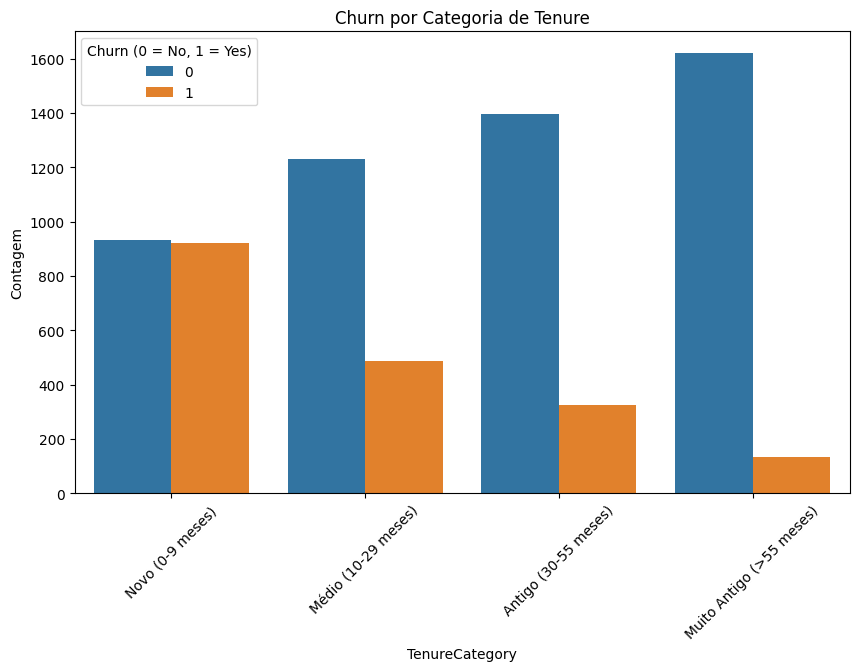

In [ ]:
# Criar TenureCategory
bins = [0, 9, 29, 55, float('inf')]
labels = ['Novo (0-9 meses)', 'Médio (10-29 meses)', 'Antigo (30-55 meses)', 'Muito Antigo (>55 meses)']
df['TenureCategory'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# Verificar distribuição de Churn por TenureCategory
print("\nChurn por TenureCategory:")
print(pd.crosstab(df['TenureCategory'], df['Churn'], normalize='index'))

# Visualização
plt.figure(figsize=(10, 6))
sns.countplot(x='TenureCategory', hue='Churn', data=df)
plt.title('Churn por Categoria de Tenure')
plt.xlabel('TenureCategory')
plt.ylabel('Contagem')
plt.legend(title='Churn (0 = No, 1 = Yes)')
plt.xticks(rotation=45)
plt.show()

## Distribuição da Evasão

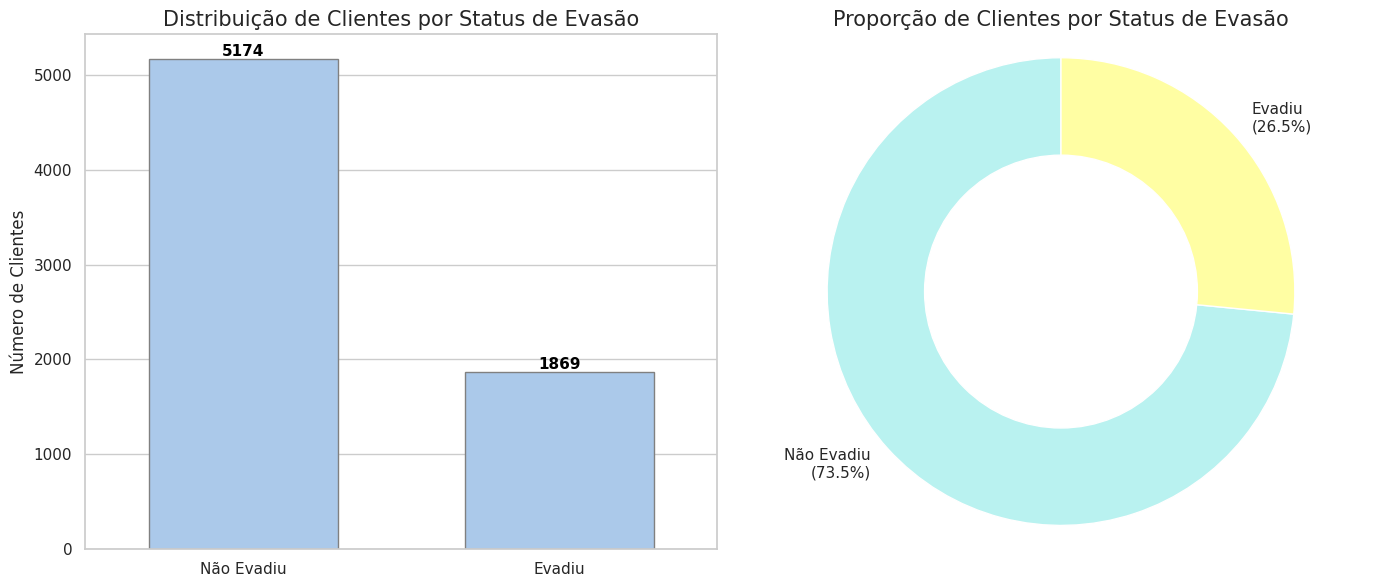

In [65]:
from matplotlib.patches import Circle

df['Churn'] = df['Churn'].replace('', np.nan)
df.dropna(subset=['Churn'], inplace=True)

if df['Churn'].dtype == 'object':
    df['Churn_Numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
    churn_column_to_plot = 'Churn_Numeric'
else:
    churn_column_to_plot = 'Churn'

sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.rcParams.update({'font.size': 11, 'axes.titlesize': 15, 'axes.labelsize': 12})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

bar = sns.countplot(
    x=churn_column_to_plot,
    data=df,
    ax=axes[0],
    width=0.6,
    edgecolor='gray'
)
axes[0].set_title('Distribuição de Clientes por Status de Evasão')
axes[0].set_xlabel('')
axes[0].set_ylabel('Número de Clientes')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Não Evadiu', 'Evadiu'])

for p in bar.patches:
    height = int(p.get_height())
    bar.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                 ha='center', va='bottom', fontsize=11, color='black', weight='bold')

churn_counts = df[churn_column_to_plot].value_counts()
churn_props = df[churn_column_to_plot].value_counts(normalize=True) * 100

labels_pie = [f'Não Evadiu\n({churn_props.get(0, 0):.1f}%)',
              f'Evadiu\n({churn_props.get(1, 0):.1f}%)']

wedges, texts = axes[1].pie(
    churn_counts,
    labels=labels_pie,
    startangle=90,
    colors=sns.color_palette("pastel")[::-1],
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    radius=1.2
)

centre_circle = Circle((0, 0), 0.70, fc='white')
axes[1].add_artist(centre_circle)

axes[1].set_title('Proporção de Clientes por Status de Evasão')
axes[1].axis('equal')

# --- Layout final ---
plt.tight_layout()
plt.savefig("taxa_de_churn.png", dpi=300)
plt.show()


<Figure size 1400x700 with 0 Axes>

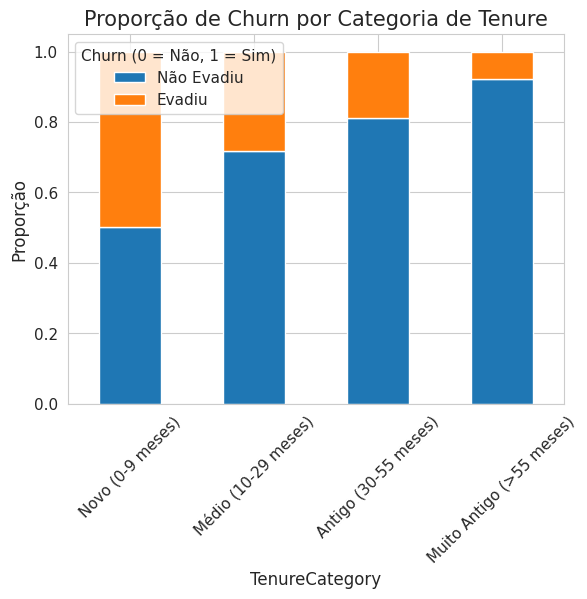

In [ ]:
plt.figure(figsize=(14, 7))
cross_tab = pd.crosstab(df['TenureCategory'], df['Churn'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Proporção de Churn por Categoria de Tenure')
plt.xlabel('TenureCategory')
plt.ylabel('Proporção')
plt.legend(title='Churn (0 = Não, 1 = Sim)', labels=['Não Evadiu', 'Evadiu'])
plt.xticks(rotation=45)
plt.show()

💡Insights

A análise da distribuição de clientes por status de evasão mostra que, dos 7043 clientes, 73,5% (5174) não evadiram, enquanto 26,5% (1869) evadiram, indicando uma base estável, mas com uma taxa de *churn* significativa. A retenção é apoiada por fatores como contratos de longo prazo e alta adesão ao serviço de telefone (90,32%), enquanto a evasão pode estar concentrada em clientes novos (*tenure* ≤ 9 meses) ou com faturamento digital (59,22%), que tendem a mudar de fornecedor. Estratégias de retenção, como promoções para clientes de baixa fidelidade, podem ajudar a reduzir o *churn* e fortalecer a base de clientes.

## 📊Contagem de Evasão por Variáveis Categóricas

A contagem de evasão por variáveis categóricas serve para identificar padrões específicos no comportamento de cancelamento (churn) entre diferentes grupos de clientes, permitindo uma análise detalhada de como fatores como gênero, tipo de contrato, método de pagamento e outros influenciam a decisão de abandonar o serviço. Essa abordagem ajuda a segmentar a base de clientes, destacando perfis com maior tendência a evasão, o que é essencial para direcionar ações estratégicas, como campanhas de retenção personalizadas ou ajustes em planos e serviços.

Evasão por genêro

As mulheres possuem uma evasão maior, porém com pouca diferença referente aos homens

In [ ]:
import plotly.express as px
fig = px.histogram(df,
                   x='gender',
                   text_auto=True,  # Mostra os valores nas barras
                   color='Churn',   # Colore as barras com base na coluna 'Churn'
                   barmode='group', # Agrupa as barras de Churn lado a lado para cada gênero
                   color_discrete_map={0: 'blueviolet', 1: 'darkgray'}, # Mapeia 0 para roxo e 1 para cinza
                   labels={'gender': 'Gênero do Cliente',  # Rótulo para o eixo X
                           'Churn': 'Status de Churn (0: Não, 1: Sim)', # Rótulo para a legenda de cor
                           'count': 'Quantidade de Clientes'} # Rótulo para o eixo Y
                  )

# Opcional: Adicione um título e ajuste os rótulos dos eixos para melhor clareza
fig.update_layout(
    title_text='Distribuição de Clientes por Gênero e Status de Churn',
    xaxis_title='Gênero',
    yaxis_title='Número de Clientes'
)

# Exiba o gráfico interativo
fig.show()

Evasão por tipo de contrato

É  possível observar que o tipo de contrato mês a mês('Month-to-month') é o que possui maior evasão

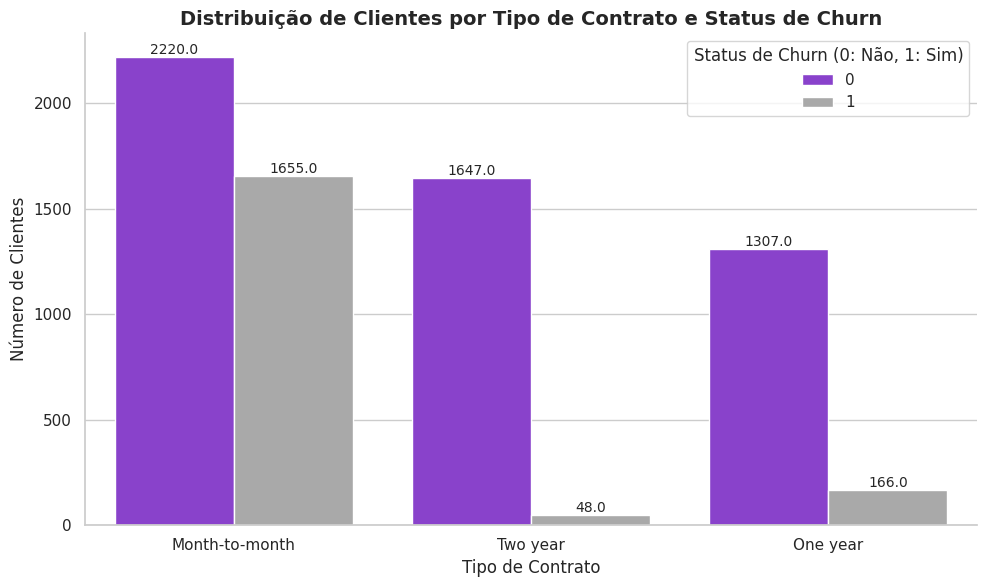

In [66]:
order = df['Contract'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='Contract', hue='Churn',
                   palette={0: 'blueviolet', 1: 'darkgray'},
                   order=order)  # ordenar eixo x pela contagem decrescente

# Adicionar valores no topo das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
      height = p.get_height()
      ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                  ha='center', va='bottom', fontsize=10)

  # Configurações dos rótulos e título
ax.set_title('Distribuição de Clientes por Tipo de Contrato e Status de Churn', fontsize=14, fontweight='bold')
ax.set_xlabel('Tipo de Contrato', fontsize=12)
ax.set_ylabel('Número de Clientes', fontsize=12)
ax.legend(title='Status de Churn (0: Não, 1: Sim)')

sns.despine()
plt.tight_layout()
plt.show()

Evasão por idade

é possível notar que o publico mais jovem possui maior quantidade de evasão

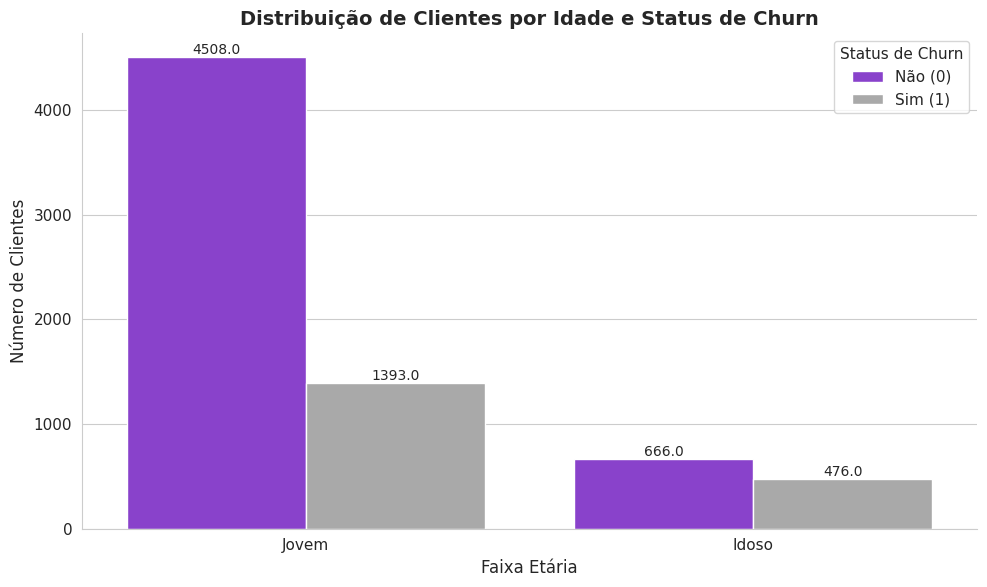

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x=df['SeniorCitizen'].map({0: 'Jovem', 1: 'Idoso'}), hue='Churn',
                   palette={0: 'blueviolet', 1: 'darkgray'})

# Adicionar os valores no topo das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                  ha='center', va='bottom', fontsize=10)

ax.set_title('Distribuição de Clientes por Idade e Status de Churn', fontsize=14, fontweight='bold')
ax.set_xlabel('Faixa Etária', fontsize=12)
ax.set_ylabel('Número de Clientes', fontsize=12)
ax.legend(title='Status de Churn', labels=['Não (0)', 'Sim (1)'])

sns.despine()
plt.tight_layout()
plt.show()


Evasão por método de pagamento

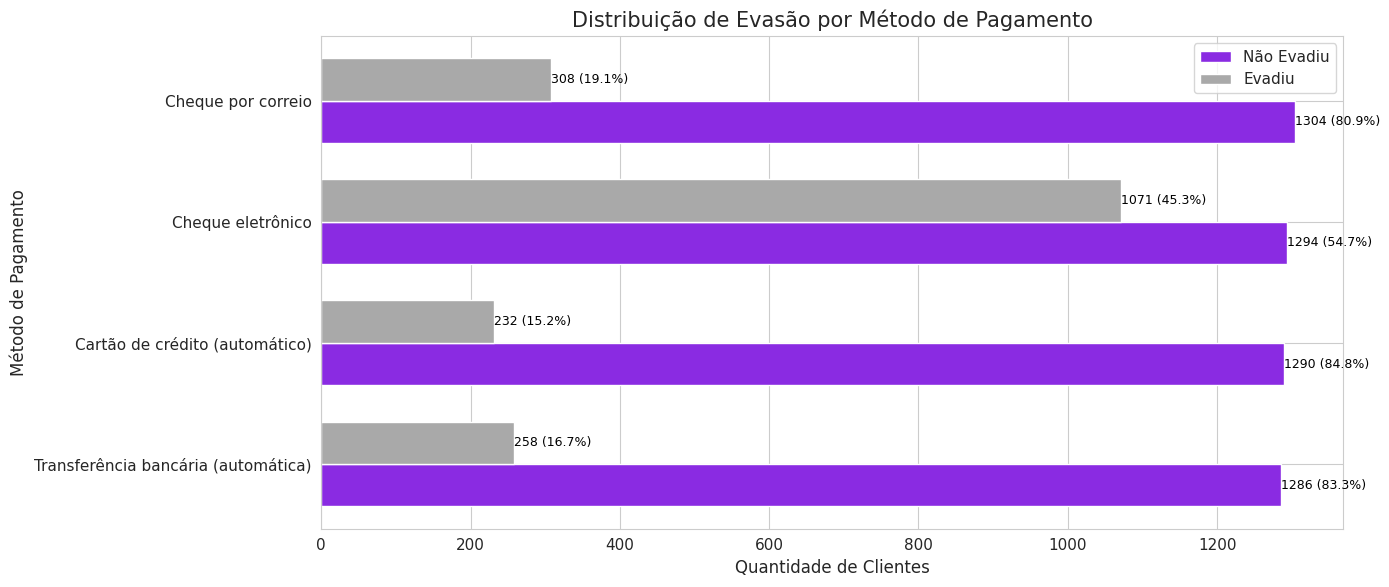

,Contas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [ ]:
cross_tab = pd.crosstab(df['PaymentMethod'], df['Churn'])

# Configuração do gráfico
plt.figure(figsize=(14, 6))
bar_width = 0.35
index = np.arange(len(cross_tab.index))

# Criar barras horizontais
bars1 = plt.barh(index - bar_width/2, cross_tab[0], bar_width, label='Não Evadiu', color='blueviolet')
bars2 = plt.barh(index + bar_width/2, cross_tab[1], bar_width, label='Evadiu', color='darkgray')

# Adicionar títulos e rótulos
plt.title('Distribuição de Evasão por Método de Pagamento')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Método de Pagamento')
plt.legend()

# Traduzir rótulos do eixo Y (métodos de pagamento)
payment_methods = {
    'Electronic check': 'Cheque eletrônico',
    'Mailed check': 'Cheque por correio',
    'Bank transfer (automatic)': 'Transferência bancária (automática)',
    'Credit card (automatic)': 'Cartão de crédito (automático)'
}
plt.yticks(index, [payment_methods.get(x, x) for x in cross_tab.index])

# Adicionar quantidade e porcentagem em cada barra
for bars in [bars1, bars2]:
    for i, bar in enumerate(bars):
        width = bar.get_width()
        total = cross_tab.iloc[i].sum()
        percentage = (width / total) * 100 if total > 0 else 0
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)} ({percentage:.1f}%)',
                 ha='left', va='center', fontsize=9, color='black')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()
df['Contas_Diarias']

## Contagem de Evasão por Variáveis Numéricas

Comparamos a distribuição de quatro variáveis numéricas: 'tenure', 'Monthly_Charge', 'Total_Charges' e 'Contas_Diarias', entre clientes que permaneceram e os que cancelaram seus serviços (churn).



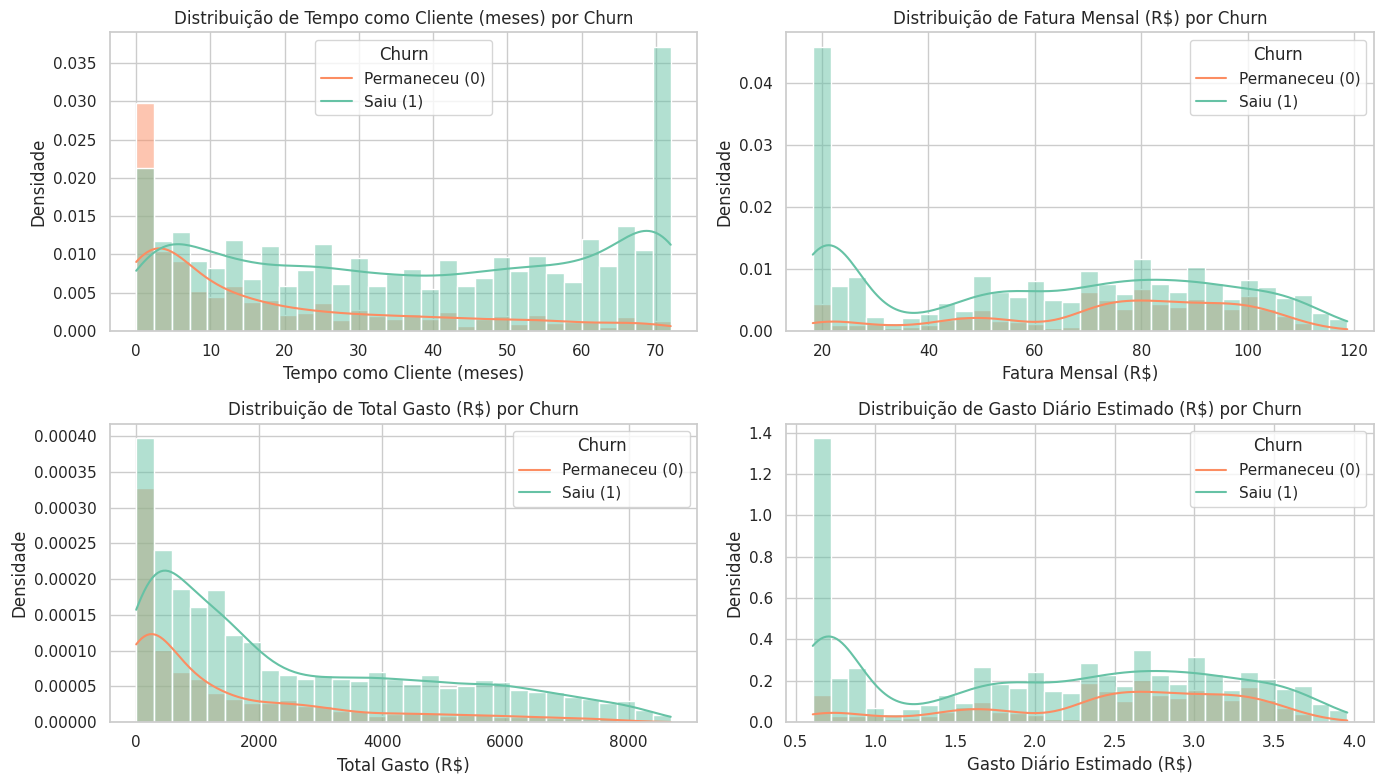

In [ ]:
sns.set(style="whitegrid")

variaveis = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']
titulos = {
    'tenure': 'Tempo como Cliente (meses)',
    'Charges.Monthly': 'Fatura Mensal (R$)',
    'Charges.Total': 'Total Gasto (R$)',
    'Contas_Diarias': 'Gasto Diário Estimado (R$)'
}

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()  # Facilita iteração

for i, col in enumerate(variaveis):
    sns.histplot(
        data=df,
        x=col,
        hue='Churn',
        kde=True,
        palette='Set2',
        bins=30,
        stat='density',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribuição de {titulos[col]} por Churn', fontsize=12)
    axes[i].set_xlabel(titulos[col])
    axes[i].set_ylabel('Densidade')
    axes[i].legend(title='Churn', labels=['Permaneceu (0)', 'Saiu (1)'])

plt.tight_layout()
plt.show()

Com esses dados possível analisar o comportamento financeiro e como ela impacta.a taxa de evasão

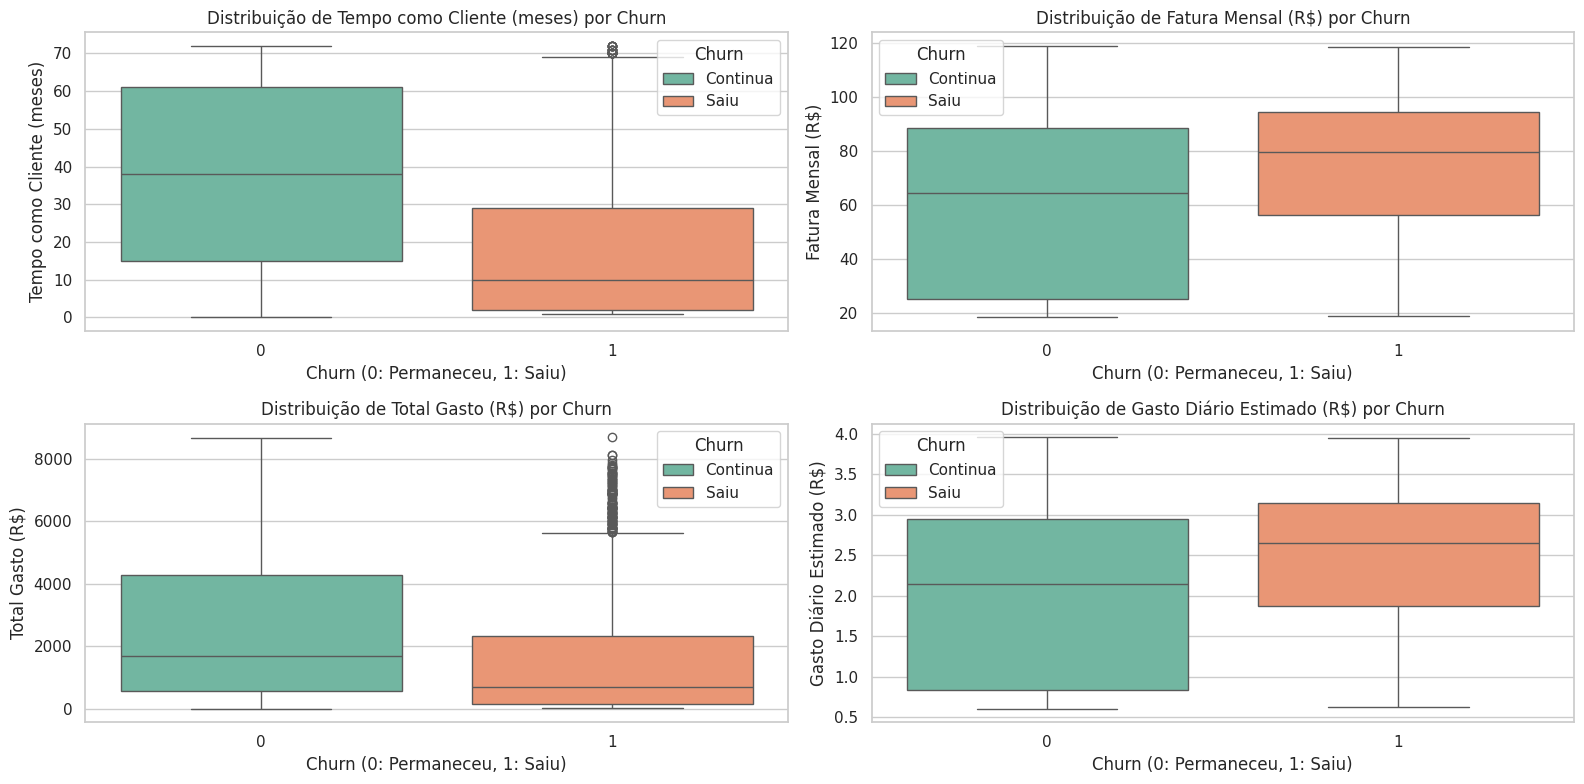

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()
for i, col in enumerate(variaveis):
    sns.boxplot(
        data=df,
        x='Churn',
        y=col,
        hue='Churn',
        palette='Set2',
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'Distribuição de {titulos[col]} por Churn', fontsize=12)
    axes[i].set_xlabel('Churn (0: Permaneceu, 1: Saiu)')
    axes[i].set_ylabel(titulos[col])
    axes[i].legend(title='Churn', labels=['Continua', 'Saiu'])  # Legenda manual

# Ajustar layout
plt.tight_layout()
plt.show()

## EXTRA: 📌 Análise de Correlação entre Variáveis

---

### 🔢 Matriz de Correlação

Abaixo está a matriz de correlação calculada com a função `corr()` do Pandas, considerando variáveis numéricas relevantes.



In [40]:
df_corr = df[['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']]
correlacoes = df_corr.corr()
correlacoes


,Churn,tenure,Charges.Monthly,Charges.Total,Contas_Diarias
Churn,1.000000,-0.352229,0.193356,-0.198324,0.193356
tenure,-0.352229,1.000000,0.247900,0.826178,0.247900
Charges.Monthly,0.193356,0.247900,1.000000,0.651174,1.000000
Charges.Total,-0.198324,0.826178,0.651174,1.000000,0.651174
Contas_Diarias,0.193356,0.247900,1.000000,0.651174,1.000000


**Interpretação**:
- Valores negativos indicam que quanto maior a variável, **menor a chance de evasão**.
- Valores positivos indicam que quanto maior a variável, **maior a chance de evasão**.

---

### 📊 Heatmap de Correlação


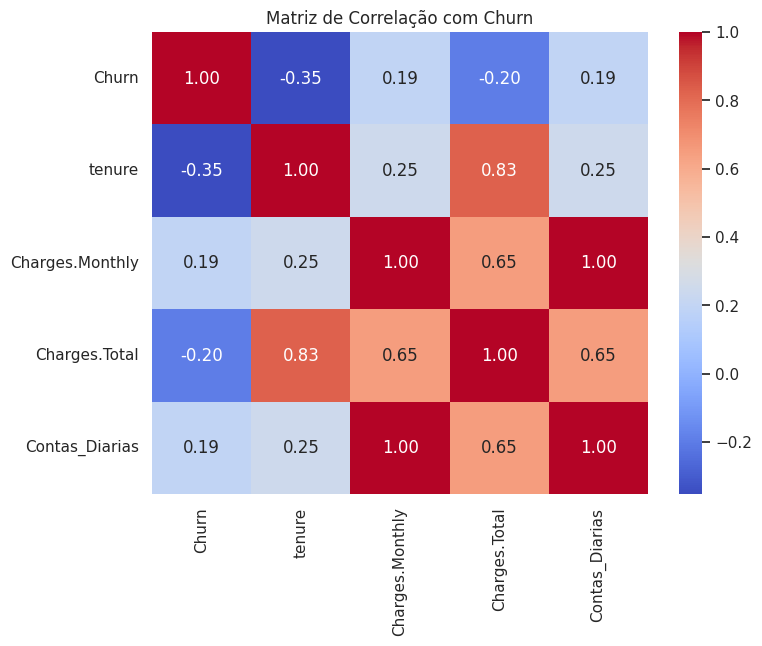

In [44]:
df_corr = df[['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']]
correlacoes = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação com Churn')
plt.show()

### 📈 Conta Diária vs Churn

Clientes com conta diária mais alta tendem a evadir mais:


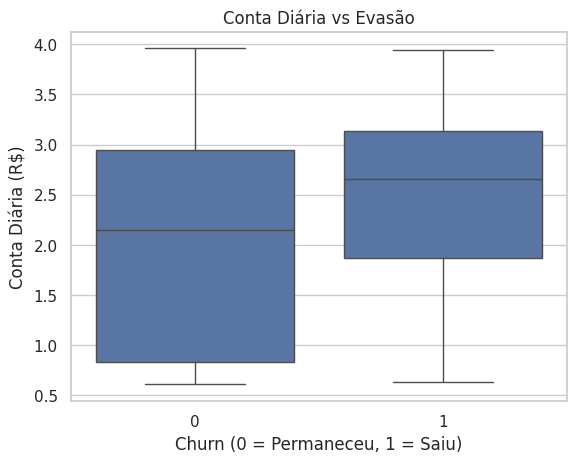

In [46]:
sns.boxplot(x='Churn', y='Contas_Diarias', data=df)
plt.title('Conta Diária vs Evasão')
plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Conta Diária (R$)')
plt.show()


### 📦 Total de Serviços Contratados vs Churn
Foi criada a variável TotalServicos, que contabiliza o número de serviços contratados por cliente. A análise mostra que:

* Clientes com menos serviços contratados têm maior chance de evadir;

* Quanto maior o engajamento com a empresa (mais serviços), menor o churn.

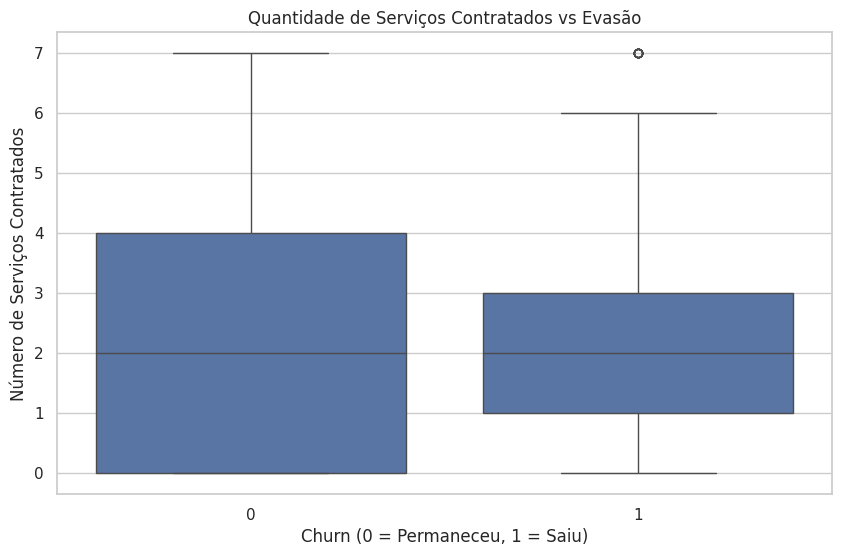

In [58]:
servicos = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df['TotalServicos'] = df[servicos].apply(lambda row: sum(row == 'Yes') if row.dtype == 'object' else sum(row), axis=1)

plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='TotalServicos', data=df)
plt.title('Quantidade de Serviços Contratados vs Evasão')
plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Número de Serviços Contratados')
plt.show()


#📄Relatorio Final
## 📊 Análise de Evasão de Clientes — TelecomX BR

---

## 1. 📝 Introdução

Este relatório apresenta uma análise detalhada da base de clientes da **TelecomX BR**, com foco no problema de **evasão de clientes (churn)**, que afeta cerca de **26,5% da base ativa**. O objetivo da análise é identificar os fatores mais relevantes que influenciam o cancelamento dos serviços e oferecer **insights estratégicos** que ajudem a empresa a **reduzir o churn e melhorar a retenção de clientes**.

---

## 2. 🧹 Limpeza e Tratamento de Dados

A base de dados foi obtida de um arquivo JSON hospedado no GitHub e passou por diversas etapas de preparação, incluindo:

- **Normalização das colunas aninhadas**: `customer`, `phone`, `internet`, `account`;
- **Tratamento de valores nulos**:
  - Linhas com `Churn` em branco (≈3%) foram removidas;
  - Nulos em `Charges.Total` foram preenchidos com base no cálculo `Charges.Monthly × tenure`;
- **Conversão de variáveis categóricas** (`Yes`/`No`) para binárias (`1`/`0`);
- **Criação de novas colunas**:
  - `Contas_Diarias` (valor diário estimado);
  - `TenureCategory` (categorias de tempo de permanência).

---

## 3. 📈 Análise Exploratória de Dados

### ✅ Taxa de Evasão (Churn)
- **26,5%** dos clientes cancelaram o serviço.
- A maioria permanece, mas a taxa de evasão é considerável.

### ⏳ Tempo de Assinatura (Tenure)
- Média: **32,4 meses** | Mediana: **29 meses**.
- Clientes com **tenure ≤ 9 meses** têm risco de churn quase **duas vezes maior**.

### 💰 Perfil Financeiro

| Variável          | Média        | Mediana      | Mín.      | Máx.       |
| ----------------- | ------------ | ------------ | --------- | ---------- |
| `Charges.Monthly` | R\$ 64,76    | R\$ 70,35    | R\$ 18,25 | R\$ 118,75 |
| `Charges.Total`   | R\$ 2.279,73 | R\$ 1.394,55 | R\$ 0     | R\$ 8.684  |
| `Contas_Diarias`  | R\$ 2,16     | R\$ 2,34     | R\$ 0,61  | R\$ 3,96   |

💡 *Clientes com faturas mais altas têm maior chance de evadir.*

### 👤 Perfil Demográfico

| Variável           | % na Base | Insight                                                        |
| ------------------ | --------- | -------------------------------------------------------------- |
| `SeniorCitizen`    | 16,2%     | Baixa representatividade — pode demandar planos mais simples   |
| `Partner`          | 48,3%     | Planos familiares podem influenciar a permanência              |
| `Dependents`       | 30%       | Famílias podem exigir serviços adicionais                      |
| `PhoneService`     | 90,3%     | Presença quase universal — pouca relevância para churn         |
| `PaperlessBilling` | 59,2%     | Clientes digitais tendem a trocar mais facilmente de operadora |

---

## 4. 📊 Visualizações e Padrões Identificados

- **Churn por Categoria de Tenure**: Clientes novos (≤ 9 meses) concentram quase metade dos casos de churn.
- **Churn por Contrato**: Contratos do tipo **Month-to-month** têm evasão muito superior aos contratos anuais/bienais.
- **Churn por Método de Pagamento**: **Cheque eletrônico** se destaca como o método com maior abandono.
- **Churn por Idade**: Clientes **jovens** (não idosos) evadem mais.
- **Churn por Cobrança**: Quanto maior a fatura, maior a evasão.

---

## 5. 🔍 Insights e Recomendações

### 🎯 Foco em Clientes Novos
- **Problema**: Alta evasão (47,8%) nos primeiros meses.
- **Ações sugeridas**:
  - Oferecer descontos de entrada;
  - Criar programas de fidelidade progressivos;
  - Implementar suporte proativo nos primeiros meses.

### 📄 Revisão de Contratos
- **Problema**: Contratos do tipo "Month-to-month" representam 42,7% do churn.
- **Ações sugeridas**:
  - Oferecer benefícios para migração para contratos longos;
  - Incluir serviços adicionais gratuitos para contratos anuais ou bienais.

### 💳 Métodos de Pagamento
- **Problema**: Cheque eletrônico tem maior associação com churn.
- **Ações sugeridas**:
  - Estimular uso de métodos automáticos (cartão, débito);
  - Oferecer bônus para quem migrar de pagamento manual para automático.

### 💸 Segmentação por Faixa de Cobrança
- **Problema**: Clientes com faturas altas evadem mais.
- **Ações sugeridas**:
  - Criar planos mais acessíveis ou personalizados;
  - Melhorar a comunicação sobre o valor entregue no serviço.

### 🧑‍🎓 Público Jovem
- **Problema**: Jovens apresentam maior evasão.
- **Ações sugeridas**:
  - Campanhas voltadas para estudantes;
  - Parcerias com instituições de ensino;
  - Planos com streaming incluso.

---

## 6. ✅ Conclusão

A evasão de clientes na TelecomX BR está fortemente associada a:

- **Baixo tempo de permanência (tenure ≤ 9 meses)**;
- **Contratos mensais**;
- **Altas cobranças mensais**;
- **Métodos de pagamento como cheque eletrônico**;
- **Público mais jovem**.

Clientes com esses perfis representam o **maior risco de evasão**, enquanto contratos longos, pagamento automático e maior fidelidade estão associados a **retenção**.

**Principais recomendações incluem:**

- Estratégias específicas para clientes novos;
- Incentivos à migração para contratos anuais/bienais;
- Estímulo ao pagamento automático;
- Personalização de planos conforme o perfil de gasto;
- Ações direcionadas para o público jovem.

**Conclusão final:** a implementação dessas estratégias pode reduzir significativamente a taxa de churn, melhorar a satisfação dos clientes e fortalecer a base da empresa.

---
